In [1]:
from Analyzation_relative import Descriptive_statistics as DS
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(6)
DS.Two_dim_hist()

6
NONE


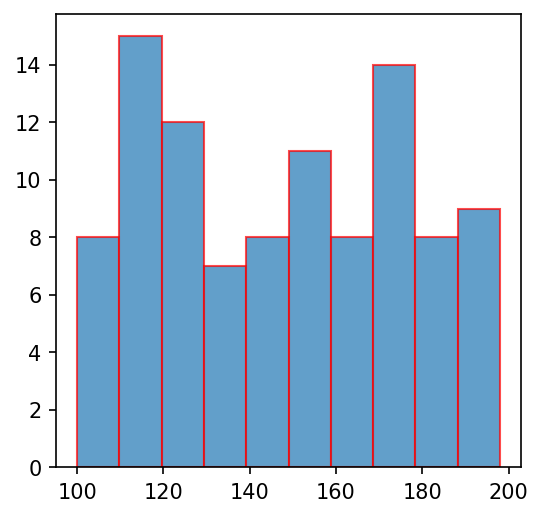

In [3]:
x = np.random.randint(100 , 200 , 100)
fig , axes = DS.One_dim_hist(x , figsize = (4 , 4))
plt.show()

SystemExit: 0

e:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
